In [6]:
from quasinet.qnet import load_qnet
from quasinet.qnet import qdistance
from quasinet.qsampling import qsample
from quasinet.qnet import membership_degree
import pandas as pd
import numpy as np

In [ ]:
pathdata='/home/ishanu/ZED/Research/truthnet/notebooks/data/ptsd/PTSD_cognet_test.csv'
df=pd.read_csv(pathdata,index_col=0)

training_index=np.random.choice(df.index.values, 100, replace=False)
df_training=df.loc[training_index,:]
df_test = df.loc[[x for x in df.index.values if x not in training_index],:]

df_training_pos=df_training[df_training.PTSDDx==1]
df_training_neg=df_training[df_training.PTSDDx==0]
df_test_pos=df_test[df_test.PTSDDx==1]
df_test_neg=df_test[df_test.PTSDDx==0]

In [10]:
featurenames=df.drop('PTSDDx',axis=1).columns
featurenames

Index(['ptsd1', 'ptsd2', 'ptsd3', 'ptsd4', 'ptsd5', 'ptsd6', 'ptsd7', 'ptsd8',
       'ptsd9', 'ptsd10',
       ...
       'ptsd202', 'ptsd203', 'ptsd204', 'ptsd205', 'ptsd206', 'ptsd207',
       'ptsd208', 'ptsd209', 'ptsd210', 'ptsd211'],
      dtype='object', length=211)

In [12]:
from quasinet.qnet import Qnet
model_pos=Qnet(feature_names=df.drop('PTSDDx',axis=1).columns,alpha=.1)
model_pos.fit(df_training_pos.drop('PTSDDx',axis=1).values.astype(str))

model_neg=Qnet(feature_names=df.drop('PTSDDx',axis=1).columns,alpha=.1)
model_neg.fit(df_training_neg.drop('PTSDDx',axis=1).values.astype(str))

qnet.Qnet

In [109]:
NULLSTR=np.array(['']*len(model_neg.feature_names))
s1=qsample(NULLSTR,model_pos,steps=100000)
s0=qsample(NULLSTR,model_neg,steps=100000)

def func(s,s0,s1):
    return qdistance(s0,s,model_neg,model_neg)/qdistance(s1,s,model_pos,model_pos)

def funcw(s):
    return membership_degree(s,model_neg)/membership_degree(s,model_pos)

def funcw_(S):
    return np.array([membership_degree(s,model_neg)/membership_degree(s,model_pos) for s in S])



In [356]:
df_test[df_test.PTSDDx==1].index.size

56

In [14]:
X=df_test.drop('PTSDDx',axis=1).values.astype(str)
dx=df_test.PTSDDx.values

In [48]:
# Function to randomly introduce NaN values in a DataFrame based on a percentage per row
def add_nan(df, percent=10):
    # Convert dataframe to float type to accommodate NaNs
    df = df.astype(float)
    
    # Iterate through each row and introduce NaNs based on the specified percentage
    for index, row in df.iterrows():
        # Determine the number of NaNs for the current row
        num_nans = int(np.ceil(len(row) * percent / 100))
        
        # Randomly choose which indices to replace with NaN
        nan_indices = np.random.choice(row.index, num_nans, replace=False)
        
        # Replace the selected indices with NaN
        for col in nan_indices:
            df.at[index, col] = np.nan
    return df

In [102]:
df_test_n=add_nan(df_test, percent=30)
X_n=pd.DataFrame(df_test_n.drop('PTSDDx',axis=1).fillna(99).values.astype(int).astype(str)).replace('99','').values.astype(str)

In [15]:
from tqdm import tqdm
pred=[func(s,s0,s1) for s in tqdm(X)]

100%|█████████████████████████████████████████| 204/204 [00:22<00:00,  9.01it/s]


In [193]:
fprWn, tprWn, thresholdsW = metrics.roc_curve(dx, ywn, pos_label=1)
metrics.auc(fprWn, tprWn)

0.852557915057915

In [16]:
yw=[funcw(s) for s in tqdm(X)]

100%|█████████████████████████████████████████| 204/204 [00:11<00:00, 17.60it/s]


In [18]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(dx, pred, pos_label=1)
metrics.auc(fpr, tpr)

0.850265444015444

0.7904198841698842

In [20]:
fprW, tprW, thresholdsW = metrics.roc_curve(dx, yw, pos_label=1)
metrics.auc(fprW, tprW)

0.8514720077220077

In [116]:
import shap
# Initialize a SHAP KernelExplainer
# Using a subset of data as the representative background dataset for speed
explainer = shap.KernelExplainer(funcw_, np.array([s0]))

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X[:10])

  0%|          | 0/10 [00:00<?, ?it/s]

<AxesSubplot:>

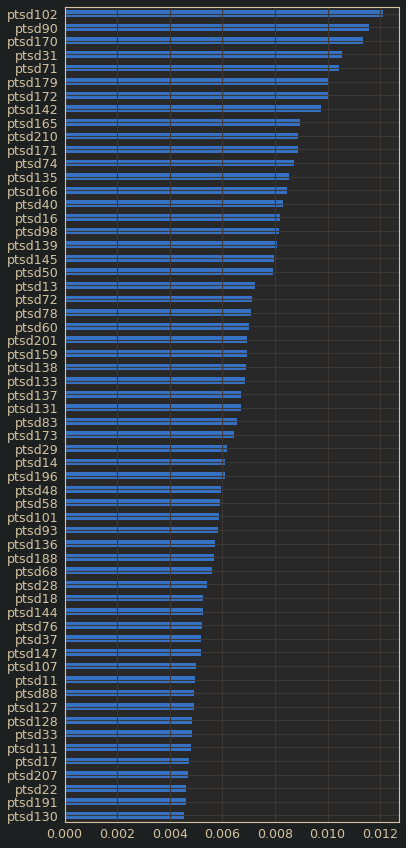

In [172]:
plt.figure(figsize=[6,15])
sf=pd.DataFrame(shap_values.mean(axis=0),columns=['shap']).assign(abshap=np.abs(shap_values.mean(axis=0)))
sf.index=featurenames
sf.sort_values('shap').tail(60).shap.plot(ax=plt.gca(),kind='barh')

In [ ]:
INDEX=sf.sort_values('shap',ascending=False).index.values
INDEX

In [ ]:
from quasinet.qnet import save_qnet

In [345]:
df_training_neg.index.values

array(['CAT1273', 'CAT1017', 'CAT1048', 'CAT1170', 'CAT1028', 'CAT1007',
       'CAT1192', 'CAT1174', 'CAT1096', 'CAT1282', 'CAT1233', 'CAT1236',
       'CAT1145', 'CAT1204', 'CAT1196', 'CAT1221', 'CAT1108', 'CAT1054',
       'CAT1202', 'CAT1149', 'CAT1181', 'CAT1127', 'CAT1161', 'CAT1016',
       'CAT1296', 'CAT1004', 'CAT1180', 'CAT1237', 'CAT1103', 'CAT1242',
       'CAT1163', 'CAT1164', 'CAT1254', 'CAT1074', 'CAT1299', 'CAT1036',
       'CAT1289', 'CAT1042', 'CAT1126', 'CAT1032', 'CAT1088', 'CAT1056',
       'CAT1148', 'CAT1119', 'CAT1081', 'CAT1005', 'CAT1063', 'CAT1200',
       'CAT1066', 'CAT1100', 'CAT1252', 'CAT1271', 'CAT1198', 'CAT1272',
       'CAT1092', 'CAT1018', 'CAT1020', 'CAT1175', 'CAT1026', 'CAT1027',
       'CAT1069', 'CAT1159', 'CAT1218', 'CAT1138', 'CAT1075', 'CAT1022',
       'CAT1121', 'CAT1094', 'CAT1060', 'CAT1029'], dtype=object)

In [346]:

model_neg.shap_index=INDEX
model_pos.shap_index=INDEX
model_neg.training_index=df_training_neg.index.values
model_pos.training_index=df_training_pos.index.values
save_qnet(model_neg,'ptsd_neg.pkl',gz=True)
save_qnet(model_pos,'ptsd_pos.pkl',gz=True)

 95%|███████████████████████████████████  | 193/204 [14:10:46<48:29, 264.49s/it]


In [348]:
df.index.values

array(['CAT1001', 'CAT1002', 'CAT1003', 'CAT1004', 'CAT1005', 'CAT1006',
       'CAT1007', 'CAT1008', 'CAT1009', 'CAT1010', 'CAT1011', 'CAT1012',
       'CAT1013', 'CAT1014', 'CAT1015', 'CAT1016', 'CAT1017', 'CAT1018',
       'CAT1019', 'CAT1020', 'CAT1021', 'CAT1022', 'CAT1023', 'CAT1024',
       'CAT1025', 'CAT1026', 'CAT1027', 'CAT1028', 'CAT1029', 'CAT1030',
       'CAT1031', 'CAT1032', 'CAT1033', 'CAT1034', 'CAT1035', 'CAT1036',
       'CAT1037', 'CAT1038', 'CAT1039', 'CAT1040', 'CAT1041', 'CAT1042',
       'CAT1043', 'CAT1044', 'CAT1045', 'CAT1046', 'CAT1047', 'CAT1048',
       'CAT1049', 'CAT1050', 'CAT1051', 'CAT1052', 'CAT1053', 'CAT1054',
       'CAT1055', 'CAT1056', 'CAT1057', 'CAT1058', 'CAT1059', 'CAT1060',
       'CAT1061', 'CAT1062', 'CAT1063', 'CAT1064', 'CAT1065', 'CAT1066',
       'CAT1067', 'CAT1068', 'CAT1069', 'CAT1070', 'CAT1071', 'CAT1072',
       'CAT1073', 'CAT1074', 'CAT1075', 'CAT1076', 'CAT1077', 'CAT1078',
       'CAT1079', 'CAT1080', 'CAT1081', 'CAT1082', 

In [354]:
test_pos_index=np.array([x for x in df.index.values if x not in df_training_pos.index.values])
dff=df.loc[test_pos_index,:]
dff[dff.PTSDDx==1]

,PTSDDx,ptsd1,ptsd2,ptsd3,ptsd4,ptsd5,ptsd6,ptsd7,ptsd8,ptsd9,...,ptsd202,ptsd203,ptsd204,ptsd205,ptsd206,ptsd207,ptsd208,ptsd209,ptsd210,ptsd211
record_id,,,,,,,,,,,,,,,,,,,,,
CAT1006,1,1,1,1,1,1,2,3,2,2,...,4,4,4,4,2,2,4,4,4,4
CAT1009,1,5,2,4,2,1,3,2,2,2,...,3,2,2,3,4,1,4,4,4,5
CAT1010,1,4,1,2,1,3,5,3,5,3,...,5,4,4,4,5,3,5,5,5,5
CAT1015,1,4,2,2,4,2,4,4,5,1,...,4,4,4,4,5,1,3,4,4,4
CAT1021,1,5,1,2,2,1,3,4,4,2,...,3,5,4,4,4,3,4,4,4,5
CAT1024,1,2,2,3,3,1,2,1,2,2,...,3,2,2,2,2,1,4,4,4,4
CAT1025,1,5,3,5,3,1,2,2,3,1,...,1,2,3,2,1,1,4,2,3,4
CAT1046,1,1,1,2,1,1,3,3,3,3,...,2,2,2,2,2,1,2,2,2,2
CAT1047,1,4,4,5,3,2,4,3,5,4,...,5,3,4,3,3,1,5,3,5,4


In [347]:
df_training_pos.index.values

array(['CAT1214', 'CAT1292', 'CAT1247', 'CAT1033', 'CAT1037', 'CAT1089',
       'CAT1061', 'CAT1263', 'CAT1077', 'CAT1043', 'CAT1084', 'CAT1155',
       'CAT1064', 'CAT1215', 'CAT1231', 'CAT1058', 'CAT1019', 'CAT1178',
       'CAT1143', 'CAT1039', 'CAT1285', 'CAT1040', 'CAT1235', 'CAT1012',
       'CAT1086', 'CAT1070', 'CAT1222', 'CAT1294', 'CAT1097', 'CAT1123'],
      dtype=object)

In [212]:
AUC={}
for m in tqdm(np.arange(5,40)):
    print(m)
    X_n=pd.concat([pd.DataFrame(columns=featurenames),df_test.drop('PTSDDx',axis=1)[INDEX[:m]]]).fillna('').values.astype(str)
    pred_n=[func(s,s0,s1) for s in X_n]
    ywn=[funcw(s) for s in X_n]
    fprWn, tprWn, thresholdsW = metrics.roc_curve(dx, ywn, pos_label=1)
    fprn, tprn, thresholdsn = metrics.roc_curve(dx, pred_n, pos_label=1)
    #print(metrics.auc(fprWn, tprWn),metrics.auc(fprn, tprn))
    
    rf=pd.DataFrame(tprn,fprn,columns=['tpr']).assign(thresholds=thresholdsn)
    rf.index.name='fpr'
    rfW=pd.DataFrame(tprWn,fprWn,columns=['tpr']).assign(thresholds=thresholdsW)
    rfW.index.name='fpr'
    rf_=pd.concat([rf,rfW]).reset_index()

    prev=.5
    zt=zedstat.processRoc(df=rf_,
               order=3, 
               total_samples=303,
               positive_samples=150,
               alpha=0.01,
               prevalence=prev)
    zt.smooth(STEP=0.001)
    zt.allmeasures(interpolate=True)
    zt.usample(precision=3)
    zt.getBounds()
    AUC[m]=zt.auc()
    print(AUC[m])



  0%|                                                    | 0/35 [00:00<?, ?it/s]

5




  3%|█▎                                          | 1/35 [00:33<18:51, 33.29s/it]

(0.8317678571428572, 0.8840622324423038, 0.7794820223312401)
6




  6%|██▌                                         | 2/35 [01:07<18:42, 34.03s/it]

(0.8493125, 0.8938028923880891, 0.804832234026497)
7




  9%|███▊                                        | 3/35 [01:42<18:21, 34.43s/it]

(0.8596964285714286, 0.8987116404283854, 0.8206945275312907)
8




 11%|█████                                       | 4/35 [02:16<17:43, 34.29s/it]

(0.8694107142857144, 0.9080142533798852, 0.830823306686231)
9




 14%|██████▎                                     | 5/35 [02:50<16:59, 33.97s/it]

(0.8699821428571428, 0.9084823334210497, 0.8314886242220694)
10




 17%|███████▌                                    | 6/35 [03:22<16:12, 33.55s/it]

(0.8624553571428573, 0.902282834444633, 0.8226355298311379)
11


 56%|███████████████████████                  | 115/204 [11:12<08:40,  5.85s/it]


 20%|████████▊                                   | 7/35 [03:56<15:38, 33.53s/it]

(0.87525, 0.9154283944029984, 0.8350801460848312)
12




 23%|██████████                                  | 8/35 [04:29<15:00, 33.36s/it]

(0.8752946428571429, 0.917088112093988, 0.8335113000348837)
13




 26%|███████████▎                                | 9/35 [05:02<14:27, 33.35s/it]

(0.8706517857142858, 0.9137565100279181, 0.8275588209416511)
14




 29%|████████████▎                              | 10/35 [05:34<13:39, 32.78s/it]

(0.8708482142857142, 0.9120135796238864, 0.829696159764361)
15




 31%|█████████████▌                             | 11/35 [06:06<12:59, 32.47s/it]

(0.8744999999999999, 0.9150057251438208, 0.8340104063508669)
16




 34%|██████████████▋                            | 12/35 [06:37<12:20, 32.21s/it]

(0.88025, 0.9210289785442417, 0.8394786714458147)
17




 37%|███████████████▉                           | 13/35 [07:09<11:45, 32.05s/it]

(0.8780089285714285, 0.9208419934862241, 0.8351814813675484)
18




 40%|█████████████████▏                         | 14/35 [07:41<11:12, 32.01s/it]

(0.8843303571428571, 0.9207281326888456, 0.8479592580515543)
19




 43%|██████████████████▍                        | 15/35 [08:12<10:38, 31.93s/it]

(0.8830535714285714, 0.9215521014013867, 0.844584531018428)
20




 46%|███████████████████▋                       | 16/35 [08:47<10:23, 32.81s/it]

(0.8844285714285715, 0.9217525398409202, 0.8471321436982234)
21




 49%|████████████████████▉                      | 17/35 [09:22<10:00, 33.35s/it]

(0.8848928571428571, 0.9231082682393236, 0.8467029444833822)
22




 51%|██████████████████████                     | 18/35 [09:56<09:32, 33.70s/it]

(0.8782232142857143, 0.9169855560308322, 0.839488413222597)
23




 54%|███████████████████████▎                   | 19/35 [10:31<09:01, 33.87s/it]

(0.8728392857142857, 0.9141786491241135, 0.8315204987515903)
24




 57%|████████████████████████▌                  | 20/35 [11:05<08:27, 33.85s/it]

(0.8723214285714287, 0.9128797854594862, 0.8317897481380565)
25




 60%|█████████████████████████▊                 | 21/35 [11:38<07:51, 33.69s/it]

(0.8742410714285713, 0.9148581077761818, 0.8336401665756488)
26




 63%|███████████████████████████                | 22/35 [12:11<07:17, 33.62s/it]

(0.8710625000000001, 0.9113406165546895, 0.83080685862629)
27




 66%|████████████████████████████▎              | 23/35 [12:45<06:44, 33.70s/it]

(0.8719910714285715, 0.9124259827866736, 0.8315901515418761)
28




 69%|█████████████████████████████▍             | 24/35 [13:19<06:10, 33.72s/it]

(0.8763125, 0.9144221686648409, 0.8382234077822913)
29




 71%|██████████████████████████████▋            | 25/35 [13:53<05:37, 33.80s/it]

(0.87225, 0.909993874624667, 0.8345359749507997)
30




 74%|███████████████████████████████▉           | 26/35 [14:27<05:04, 33.79s/it]

(0.8689553571428571, 0.906673534852364, 0.8312577558804826)
31




 77%|█████████████████████████████████▏         | 27/35 [15:01<04:31, 33.98s/it]

(0.8661160714285714, 0.9041196614032088, 0.8281330579010664)
32




 80%|██████████████████████████████████▍        | 28/35 [15:35<03:57, 33.89s/it]

(0.8627767857142858, 0.9013927804375911, 0.8241935442815554)
33




 83%|███████████████████████████████████▋       | 29/35 [16:08<03:21, 33.59s/it]

(0.8643035714285714, 0.9019460603871369, 0.8266938357605812)
34




 86%|████████████████████████████████████▊      | 30/35 [16:42<02:48, 33.67s/it]

(0.8678928571428571, 0.9047809442819938, 0.8310253464508527)
35




 89%|██████████████████████████████████████     | 31/35 [17:14<02:13, 33.39s/it]

(0.8605357142857143, 0.898376285563636, 0.8227157194549248)
36




 91%|███████████████████████████████████████▎   | 32/35 [17:46<01:38, 32.81s/it]

(0.8685535714285715, 0.9063457939383526, 0.8307880253734758)
37




 94%|████████████████████████████████████████▌  | 33/35 [18:17<01:04, 32.41s/it]

(0.8720714285714286, 0.9116105035166624, 0.832552930073327)
38




 97%|█████████████████████████████████████████▊ | 34/35 [18:49<00:32, 32.27s/it]

(0.8659285714285715, 0.9060242408899298, 0.8258490334619006)
39




100%|███████████████████████████████████████████| 35/35 [19:20<00:00, 33.17s/it]

(0.8586339285714286, 0.8993284410729847, 0.8179527268866915)


<AxesSubplot:>

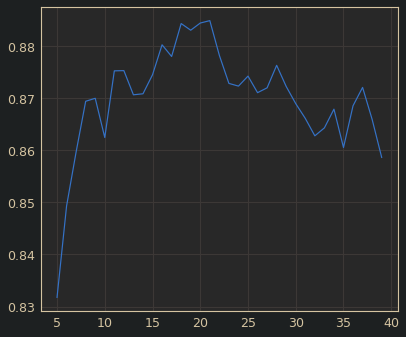

In [218]:
pd.DataFrame(AUC).transpose()[0].plot()

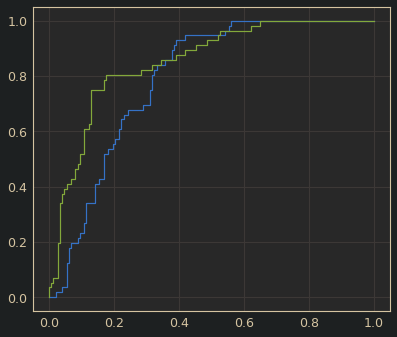

In [195]:
import pylab as plt
plt.plot(fprn,tprn)
plt.plot(fprWn,tprWn)

In [242]:
rf=pd.DataFrame(tprn,fprn,columns=['tpr']).assign(threshold=thresholdsn)
rf.index.name='fpr'
rfW=pd.DataFrame(tprWn,fprWn,columns=['tpr']).assign(threshold=thresholdsW)
rfW.index.name='fpr'
rf_=pd.concat([rf,rfW]).reset_index()

In [254]:
from zedstat import zedstat 
from jupyterthemes import jtplot
jtplot.style()
prev=.5
zt=zedstat.processRoc(df=rfW,
           order=3, 
           total_samples=303,
           positive_samples=150,
           alpha=0.01,
           prevalence=prev)

In [255]:
zt.smooth(STEP=0.001)
zt.allmeasures(interpolate=True)
zt.usample(precision=3)
zt.getBounds()

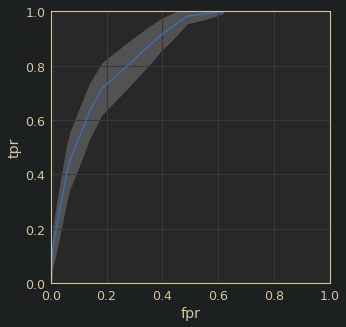

In [256]:
plt.figure(figsize=[5,5])
ax=plt.gca()
ax=zt.get().tpr.plot(ax=ax)
plt.fill_between(x=zt.get().index, y1=zt.df_lim['U'].tpr,y2=zt.df_lim['L'].tpr, color='w',alpha=.2)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_ylabel('tpr');

In [257]:
zt.auc()

(0.8581785714285715, 0.899659043250686, 0.8167114104232758)

In [281]:
import json
filepath='/home/ishanu/Dropbox/paraknowledge/paraknowledgecorp/webpage/veritas/responses3.json'
#filepath='/home/ishanu/Dropbox/paraknowledge/paraknowledgecorp/saas/cloud_functions/test_deployments/ptsd1.json'
with open(filepath, 'r') as file:
    data = json.load(file)


In [282]:
sr=pd.concat([pd.DataFrame(columns=featurenames),
              pd.DataFrame(data['questionnaireResponses'][0]['dfwdfw'],
                           index=['resp'])]).fillna('').values[0].astype(str)

In [285]:
func(sr,s0,s1)

1.0537457094642053

In [286]:
funcw(sr)

2.2870360090080957

In [287]:
rr=funcw(sr)
z=zt.get()
z[z.threshold<rr]

,tpr,ppv,acc,npv,LR+,LR-,threshold
fpr,,,,,,,
0.006,0.107143,0.912334,0.550676,0.527125,18.451049,0.897959,2.283395
0.007,0.130466,0.911446,0.561372,0.533226,18.270773,0.876072,2.100846
0.008,0.135933,0.911003,0.563623,0.534806,18.041545,0.871193,2.091065
0.009,0.141399,0.910559,0.565873,0.536386,17.812318,0.866313,2.081284
0.010,0.146866,0.910115,0.568124,0.537966,17.583090,0.861433,2.071503
...,...,...,...,...,...,...,...
0.996,1.000000,0.457165,0.501997,1.350568,1.006424,0.000000,0.272287
0.997,1.000000,0.456706,0.501498,1.351503,1.004818,0.000000,0.271478
0.998,1.000000,0.456247,0.500998,1.352438,1.003212,0.000000,0.270669


In [279]:
allitempath='/home/ishanu/Dropbox/paraknowledge/paraknowledgecorp/webpage/PTSD_DX_itembank.json'
with open(allitempath, 'r') as file:
    allitem = json.load(file)
newdict={key:val for key,val in allitem.items() if key in [x.upper() for x in INDEX[:30]]}


In [280]:
newdict

{'PTSD13': 'How much were you distressed or bothered by feeling kind of numb about a stressful event in the past?',
 'PTSD16': 'How much of a problem have you had with having no interest in leisure activities due to a stressful event in the past?',
 'PTSD31': 'Have you ever had any experience that was so frightening, horrible, or upsetting that you felt numb or detached from others, activities, or your surroundings?',
 'PTSD40': "I have had a hard time thinking about the future and believing that I'm going to live to old age.",
 'PTSD50': 'How often have you felt sadness due to a stressful event in the past?',
 'PTSD60': 'Have you been irritable or had outbursts of anger?',
 'PTSD71': 'How much were you distressed or bothered by feeling watchful and on-guard due to a stressful event in the past?',
 'PTSD72': 'How much were you distressed or bothered by feeling irritable and angry due to a stressful event in the past?',
 'PTSD74': 'How much were you distressed or bothered by having trou

In [298]:
INDEX[:30]

array(['ptsd102', 'ptsd90', 'ptsd170', 'ptsd31', 'ptsd71', 'ptsd179',
       'ptsd172', 'ptsd142', 'ptsd165', 'ptsd210', 'ptsd171', 'ptsd74',
       'ptsd135', 'ptsd166', 'ptsd40', 'ptsd16', 'ptsd98', 'ptsd139',
       'ptsd145', 'ptsd50', 'ptsd13', 'ptsd72', 'ptsd78', 'ptsd60',
       'ptsd201', 'ptsd159', 'ptsd138', 'ptsd133', 'ptsd137', 'ptsd131'],
      dtype=object)

In [332]:
tf=df_training_pos.copy().drop('PTSDDx',axis=1)
nf=df_training_neg.copy().drop('PTSDDx',axis=1)


In [321]:
def dissonance(pos,seq,model):
    D=model.predict_distributions(seq) 
    return 1-D[pos].get(str(seq[pos]),0)

In [322]:
#dtf=[dissonance(3,s,model_neg) for s in tf.values]

In [330]:
dtfp={}
for i in tqdm(range(211)):
    dtfp[i]=[dissonance(i,s,model_pos) for s in tf.values]
dtfn={}
for i in tqdm(range(211)):
    dtfn[i]=[dissonance(i,s,model_neg) for s in tf.values]

100%|█████████████████████████████████████████| 211/211 [05:51<00:00,  1.67s/it]


<AxesSubplot:>

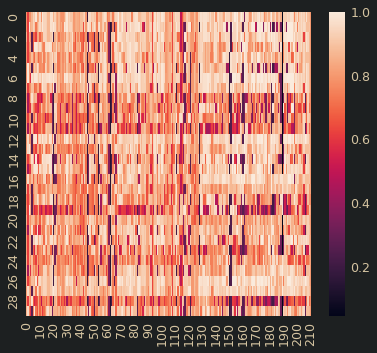

In [326]:
import seaborn as sns
sns.heatmap(pd.DataFrame(dtf))

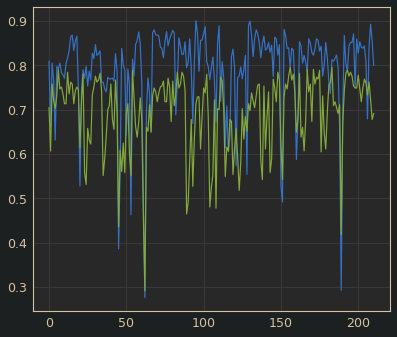

In [331]:
ax=pd.DataFrame(dtfn).mean().plot()
ax=pd.DataFrame(dtfp).mean().plot(ax=ax)


In [333]:
ntfp={}
for i in tqdm(range(211)):
    ntfp[i]=[dissonance(i,s,model_pos) for s in nf.values]
ntfn={}
for i in tqdm(range(211)):
    ntfn[i]=[dissonance(i,s,model_neg) for s in nf.values]

100%|█████████████████████████████████████████| 211/211 [13:31<00:00,  3.85s/it]


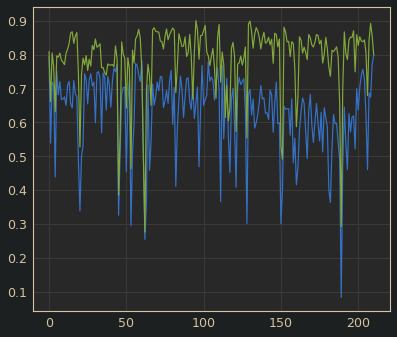

In [334]:
ax=pd.DataFrame(ntfn).mean().plot()
ax=pd.DataFrame(ntfp).mean().plot(ax=ax)


In [342]:
def funcd(s,model_pos,model_neg):
    dp=np.array([dissonance(i,s,model_pos) for i in range(len(model_pos.feature_names))])
    dn=np.array([dissonance(i,s,model_neg) for i in range(len(model_neg.feature_names))])
    return (dn-dp).mean()
    

In [343]:
ywd=[funcd(s,model_pos,model_neg) for s in tqdm(X_n)]





  0%|                                                   | 0/204 [00:00<?, ?it/s]



  0%|▏                                          | 1/204 [00:10<35:51, 10.60s/it]



  1%|▍                                          | 2/204 [00:21<35:53, 10.66s/it]



  1%|▋                                          | 3/204 [00:32<35:50, 10.70s/it]



  2%|▊                                          | 4/204 [00:42<35:25, 10.63s/it]



  2%|█                                          | 5/204 [00:52<34:46, 10.49s/it]



  3%|█▎                                         | 6/204 [01:03<34:43, 10.52s/it]



  3%|█▍                                         | 7/204 [01:13<34:29, 10.50s/it]



  4%|█▋                                         | 8/204 [01:23<33:15, 10.18s/it]



  4%|█▉                                         | 9/204 [01:32<32:30, 10.00s/it]



  5%|██                                        | 10/204 [01:43<32:35, 10.08s/it]



  5%|██▎                                       | 11/204 [01:53<32:59, 10

 42%|█████████████████▌                        | 85/204 [14:24<19:16,  9.72s/it]



 42%|█████████████████▋                        | 86/204 [14:34<19:09,  9.74s/it]



 43%|█████████████████▉                        | 87/204 [14:44<18:58,  9.73s/it]



 43%|██████████████████                        | 88/204 [14:53<18:49,  9.74s/it]



 44%|██████████████████▎                       | 89/204 [15:03<18:32,  9.68s/it]



 44%|██████████████████▌                       | 90/204 [15:13<18:27,  9.71s/it]



 45%|██████████████████▋                       | 91/204 [15:22<18:14,  9.69s/it]



 45%|██████████████████▉                       | 92/204 [15:32<17:58,  9.63s/it]



 46%|███████████████████▏                      | 93/204 [15:41<17:42,  9.58s/it]



 46%|███████████████████▎                      | 94/204 [15:51<17:28,  9.53s/it]



 47%|███████████████████▌                      | 95/204 [16:00<17:23,  9.57s/it]



 47%|███████████████████▊                      | 96/204 [16:10<17:12,  9.56s

 83%|██████████████████████████████████▏      | 170/204 [28:43<06:24, 11.31s/it]



 84%|██████████████████████████████████▎      | 171/204 [28:54<06:14, 11.34s/it]



 84%|██████████████████████████████████▌      | 172/204 [29:06<06:03, 11.37s/it]



 85%|██████████████████████████████████▊      | 173/204 [29:17<05:53, 11.41s/it]



 85%|██████████████████████████████████▉      | 174/204 [29:29<05:40, 11.36s/it]



 86%|███████████████████████████████████▏     | 175/204 [29:40<05:32, 11.47s/it]



 86%|███████████████████████████████████▎     | 176/204 [29:51<05:15, 11.28s/it]



 87%|███████████████████████████████████▌     | 177/204 [30:01<04:54, 10.92s/it]



 87%|███████████████████████████████████▊     | 178/204 [30:11<04:35, 10.61s/it]



 88%|███████████████████████████████████▉     | 179/204 [30:21<04:20, 10.43s/it]



 88%|████████████████████████████████████▏    | 180/204 [30:33<04:18, 10.78s/it]



 89%|████████████████████████████████████▍    | 181/204 [30:44<04:13, 11.03s

In [344]:
fprWdn, tprWdn, thresholdsWd = metrics.roc_curve(dx, ywn, pos_label=1)
print(metrics.auc(fprWdn, tprWdn))

0.8416988416988418
